<a href="https://colab.research.google.com/github/charithcherry/Internship-and-College-Repo-/blob/master/Assignments/Cifar10_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf  
 
# Display the version
print(tf.__version__)    
 
# other imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

2.7.0


In [2]:
cifar10 = tf.keras.datasets.cifar10
 
# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

170508288/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0
 
# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

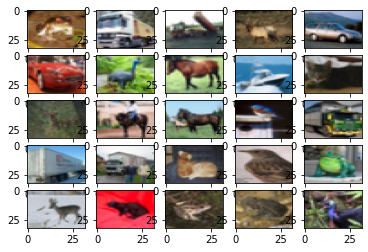

In [4]:
# visualize data by plotting images
fig, ax = plt.subplots(5, 5)
k = 0
 
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k], aspect='auto')
        k += 1
 
plt.show()

In [6]:
K = len(set(y_train))
print(K)


10


# **Net A**

In [8]:
#model 

i = Input(shape=x_train[0].shape)
x = Flatten()(i)
x = Dense(K, activation='softmax')(x)
NetA = Model(i, x)
NetA.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                30730     
                                                                 
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


In [12]:
NetA.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
  width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
 
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
 
NetAmodel = NetA.fit(train_generator, validation_data=(x_test, y_test),
              steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 30s 19ms/step - loss: 2.0296 - accuracy: 0.2901 - val_loss: 1.9755 - val_accuracy: 0.3198
Epoch 2/50
1562/1562 [==============================] - 29s 18ms/step - loss: 1.9675 - accuracy: 0.3176 - val_loss: 1.9690 - val_accuracy: 0.3170
Epoch 3/50
1562/1562 [==============================] - 29s 18ms/step - loss: 1.9573 - accuracy: 0.3229 - val_loss: 1.8324 - val_accuracy: 0.3660
Epoch 4/50
1562/1562 [==============================] - 29s 19ms/step - loss: 1.9549 - accuracy: 0.3262 - val_loss: 1.9788 - val_accuracy: 0.3310
Epoch 5/50
1562/1562 [==============================] - 29s 19ms/step - loss: 1.9370 - accuracy: 0.3328 - val_loss: 1.8332 - val_accuracy: 0.3701
Epoch 6/50
1562/1562 [==============================] - 29s 18ms/step - loss: 1.9370 - accuracy: 0.3298 - val_loss: 1.9393 - val_accuracy: 0.3360
Epoch 7/50
1562/1562 [==============================] - 29s 19ms/step - loss: 1.9349 - accuracy: 0.3346 - val_loss: 1.9897 -

# **Net B**

In [29]:
#model 

i = Input(shape=x_train[0].shape)
x = Flatten()(i)
x = Dense(300, activation='relu')(x)
x = Dense(K, activation='softmax')(x)
NetB = Model(i, x)
NetB.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 300)               921900    
                                                                 
 dense_3 (Dense)             (None, 10)                3010      
                                                                 
Total params: 924,910
Trainable params: 924,910
Non-trainable params: 0
_________________________________________________________________


In [30]:
NetB.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
  width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
 
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
 
NetBmodel = NetB.fit(train_generator, validation_data=(x_test, y_test),
              steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 38s 24ms/step - loss: 1.9422 - accuracy: 0.3045 - val_loss: 1.7752 - val_accuracy: 0.3662
Epoch 2/50
1562/1562 [==============================] - 37s 24ms/step - loss: 1.8049 - accuracy: 0.3501 - val_loss: 1.7136 - val_accuracy: 0.3855
Epoch 3/50
1562/1562 [==============================] - 37s 24ms/step - loss: 1.7525 - accuracy: 0.3695 - val_loss: 1.6475 - val_accuracy: 0.4089
Epoch 4/50
1562/1562 [==============================] - 37s 24ms/step - loss: 1.7257 - accuracy: 0.3798 - val_loss: 1.6922 - val_accuracy: 0.4018
Epoch 5/50
1562/1562 [==============================] - 37s 24ms/step - loss: 1.6937 - accuracy: 0.3911 - val_loss: 1.6510 - val_accuracy: 0.4092
Epoch 6/50
1562/1562 [==============================] - 37s 24ms/step - loss: 1.6772 - accuracy: 0.3963 - val_loss: 1.6688 - val_accuracy: 0.4126
Epoch 7/50
1562/1562 [==============================] - 37s 24ms/step - loss: 1.6685 - accuracy: 0.4032 - val_loss: 1.5883 -

# **Net C**

In [32]:
#model 

i = Input(shape=x_train[0].shape)
x = Conv2D(25, (5, 5), activation='relu')(i)
x = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(K, activation='softmax')(x)
NetC = Model(i, x)
NetC.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 25)        1900      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 25)       0         
 )                                                               
                                                                 
 flatten_3 (Flatten)         (None, 4900)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                49010     
                                                                 
Total params: 50,910
Trainable params: 50,910
Non-trainable params: 0
_______________________________________________________

In [33]:
NetC.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
  width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
 
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
 
NetCmodel = NetC.fit(train_generator, validation_data=(x_test, y_test),
              steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 62s 39ms/step - loss: 1.6031 - accuracy: 0.4275 - val_loss: 1.3541 - val_accuracy: 0.5209
Epoch 2/50
1562/1562 [==============================] - 61s 39ms/step - loss: 1.3951 - accuracy: 0.5072 - val_loss: 1.2747 - val_accuracy: 0.5507
Epoch 3/50
1562/1562 [==============================] - 61s 39ms/step - loss: 1.3202 - accuracy: 0.5341 - val_loss: 1.3685 - val_accuracy: 0.5355
Epoch 4/50
1562/1562 [==============================] - 61s 39ms/step - loss: 1.2745 - accuracy: 0.5551 - val_loss: 1.1832 - val_accuracy: 0.5853
Epoch 5/50
1562/1562 [==============================] - 61s 39ms/step - loss: 1.2477 - accuracy: 0.5644 - val_loss: 1.1617 - val_accuracy: 0.5908
Epoch 6/50
1562/1562 [==============================] - 61s 39ms/step - loss: 1.2249 - accuracy: 0.5720 - val_loss: 1.1617 - val_accuracy: 0.6046
Epoch 7/50
1562/1562 [==============================] - 61s 39ms/step - loss: 1.2143 - accuracy: 0.5733 - val_loss: 1.1784 -

# **Model Evaluation**

Name NetA
Train Accurancy 0.3504999876022339
Train Loss 2.006119966506958
Test Accurancy 0.3479999899864197
Test Loss 2.0116188526153564
Train and Validation accuracy plot for NetA


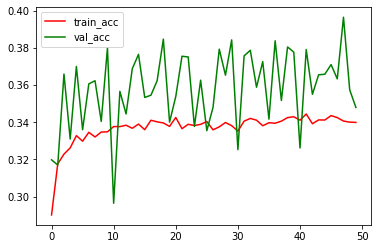

Name NetB
Train Accurancy 0.4764600098133087
Train Loss 1.4677869081497192
Test Accurancy 0.4726000130176544
Test Loss 1.4735066890716553
Train and Validation accuracy plot for NetB


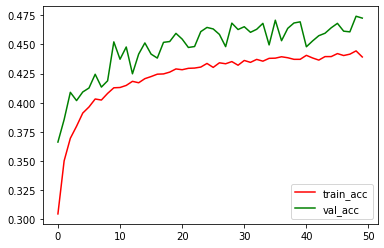

Name NetC
Train Accurancy 0.677839994430542
Train Loss 0.9530564546585083
Test Accurancy 0.6662999987602234
Test Loss 1.0031979084014893
Train and Validation accuracy plot for NetC


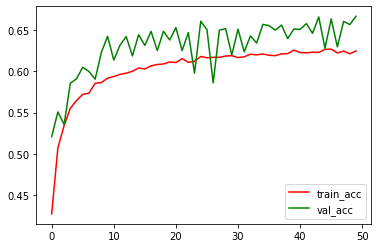

In [41]:
nets= [NetAmodel,NetBmodel,NetCmodel]
net_name=['NetA','NetB','NetC']
models=[NetA,NetB,NetC]

i=0
for name,net,model in zip(net_name,nets,models):
    train_loss,train_acc=model.evaluate(x_train,y_train,verbose=0)
    test_loss,test_acc = model.evaluate(x_test, y_test, verbose = 0)
    print('Name {}'.format(name))
    print('Train Accurancy {}'.format(train_acc))
    print('Train Loss {}'.format(train_loss))
    print('Test Accurancy {}'.format(test_acc))
    print('Test Loss {}'.format(test_loss))
    print('Train and Validation accuracy plot for {}'.format(name))
    plt.figure(i)
    plt.plot(net.history['accuracy'], label='train_acc', color='red')
    plt.plot(net.history['val_accuracy'], label='val_acc', color='green')
    plt.legend()
    plt.show()
    i=i+1


